In [2]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 


a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.


In [3]:
n, p = 10, 0.25

x = np.random.binomial(n, p, 10)
df = pd.DataFrame({
  "Số lần thử": range(1, len(x) + 1),
  "Số câu đúng": x
})
df

,Số lần thử,Số câu đúng
0,1,0
1,2,1
2,3,4
3,4,3
4,5,3
5,6,4
6,7,1
7,8,2
8,9,1
9,10,2


b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

 Công thức điểm: Y = 4*X + (-2)*(10 - X) = 6*X - 20
 
 Để Y = 4, ta có 6*X - 20 = 4 => X = 4

In [5]:
print("Xác xuất sinh viên được 4 điểm:", binom.pmf(4, n, p) * 100)

Xác xuất sinh viên được 4 điểm: 14.599800109863272


c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [6]:
Ex = n * p
Varx = n * p * (1 - p)

print("E(x):", Ex)
print("Varx:", Varx)

E(x): 2.5
Varx: 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [8]:
lambda_calls = 3

print("Xác xuất 1 cuộc gọi là:", poisson.pmf(1, lambda_calls) * 100)
print("Xác xuất 1 cuộc gọi là:", poisson.pmf(2, lambda_calls) * 100)
print("Xác xuất 1 cuộc gọi là:", poisson.pmf(3, lambda_calls) * 100)

Xác xuất 1 cuộc gọi là: 14.936120510359185
Xác xuất 1 cuộc gọi là: 22.404180765538776
Xác xuất 1 cuộc gọi là: 22.404180765538776


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

In [15]:
mu = 500
sigma = 4

norm_cdf_505 = norm.cdf(505, loc=mu, scale=sigma)
norm_cdf_495 = norm.cdf(495, loc=mu, scale=sigma)

print("Xác xuất loại 1:", norm.sf(505, loc=mu, scale=sigma) * 100)
print("Xác xuất loại 2:", (norm_cdf_505 - norm_cdf_495) * 100 )
print("Xác xuất loại 3:", norm_cdf_495 * 100)

Xác xuất loại 1: 10.564977366685536
Xác xuất loại 2: 78.87004526662894
Xác xuất loại 3: 10.564977366685536


b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu


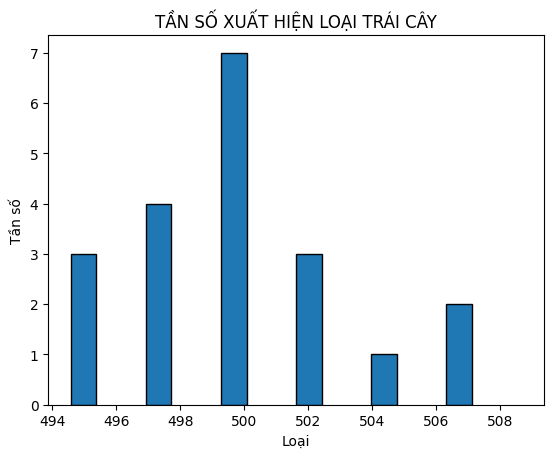

Giá trị trung bình: 500.77360743792616
Giá trị trung bình: 3.5604027403045717


In [30]:
norm_data = norm.rvs(loc=mu, scale=sigma, size=20)

bins = int(np.ceil(np.log2(len(norm_data)) + 1))
plt.hist(norm_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Loại')
plt.ylabel('Tần số')
plt.title('TẦN SỐ XUẤT HIỆN LOẠI TRÁI CÂY')

plt.show()

print("Giá trị trung bình:", norm_data.mean())
print("Giá trị trung bình:", norm_data.std())

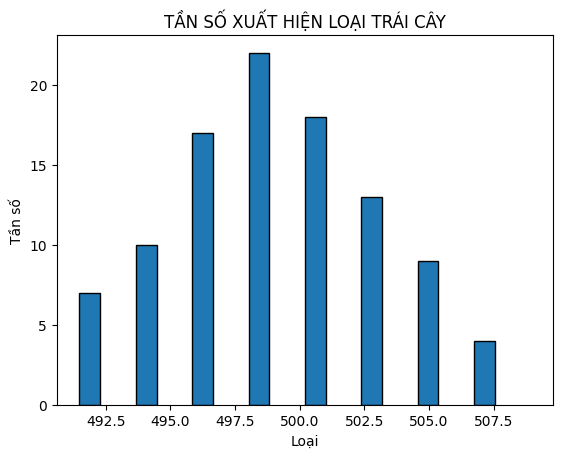

Giá trị trung bình: 499.8561454417686
Giá trị trung bình: 3.9820154330522115


In [36]:
norm_data = norm.rvs(loc=mu, scale=sigma, size=100)

bins = int(np.ceil(np.log2(len(norm_data)) + 1))
plt.hist(norm_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Loại')
plt.ylabel('Tần số')
plt.title('TẦN SỐ XUẤT HIỆN LOẠI TRÁI CÂY')

plt.show()

print("Giá trị trung bình:", norm_data.mean())
print("Giá trị trung bình:", norm_data.std())

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

Nhận xét: Với mẫu n=100, trung bình và độ lệch chuẩn mẫu gần với giá trị thực của dân số (500 gam và 4 gam) hơn so với mẫu n=20.

**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4


c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

In [46]:
n, p = 500, 0.7

binom_data = binom.rvs(n=n, p=p, size=5000)

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3


In [47]:
s = pd.Series(binom_data)

print("min:", s.min())
print("max:", s.max())
print("q1:", s.quantile(0.25))
print("q2:", s.quantile(0.5))
print("q3:", s.quantile(0.75))

min: 313
max: 388
q1: 343.0
q2: 350.0
q3: 357.0


b. Vẽ đồ thị boxplot

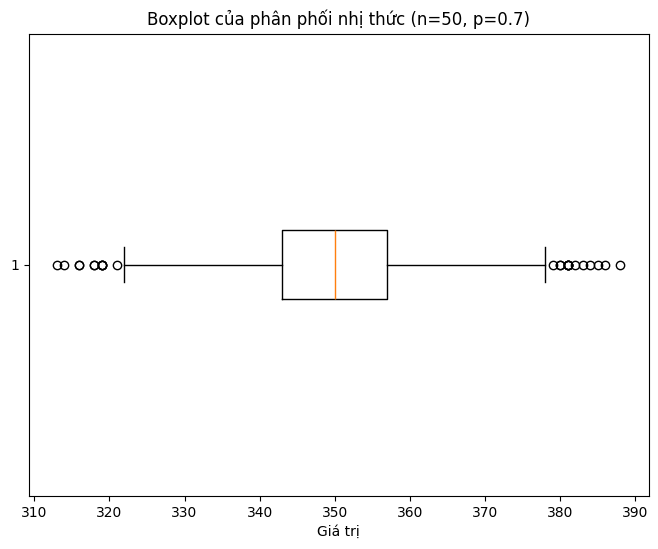

In [48]:
plt.figure(figsize=(8, 6))
plt.boxplot(s, vert=False)
plt.title("Boxplot của phân phối nhị thức (n=50, p=0.7)")
plt.xlabel("Giá trị")
plt.show()


c. Vẽ các đồ thị: tần số, tần suất

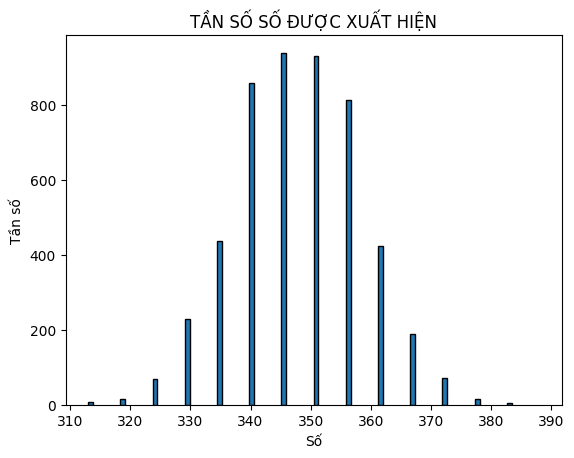

In [50]:
bins = int(np.ceil(np.log2(len(binom_data)) + 1))
plt.hist(binom_data, bins=bins, edgecolor="black", width=0.8)

plt.xlabel('Số')
plt.ylabel('Tần số')
plt.title('TẦN SỐ SỐ ĐƯỢC XUẤT HIỆN')

plt.show()
